#### 순환 뉴런

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Simple RNN
simple_rnn_model = keras.models.Sequential(keras.layers.SimpleRNN(units=1, input_shape=[None, 1]))

In [6]:
simple_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


📌 sequence의 길이가 3이므로, 3개의 결과가 출력

In [7]:
x = np.array([1.0, 2.0, 3.0]).reshape(1, -1, 1)
x.shape

(1, 3, 1)

In [8]:
RNN_layer1 = keras.layers.SimpleRNN(units=1, input_shape=[None, 1])
RNN_layer1(x)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5696613]], dtype=float32)>

In [9]:
# return_sequences = True : 모든 스텝별로 계산된 sequence 출력
keras.layers.SimpleRNN(units=1, input_shape=[None, 1], return_sequences=True)(x)

<tf.Tensor: shape=(1, 3, 1), dtype=float32, numpy=
array([[[-0.8515258 ],
        [-0.9976604 ],
        [-0.99985975]]], dtype=float32)>

In [11]:
# two-dimensional input
x2 = np.array([[1.0, 2.0, 3.0, 4.0],
[4.0, 3.0, 2.0, 1.0]]).reshape(1, -1, 2)

x2.shape

(1, 4, 2)

In [12]:
keras.layers.SimpleRNN(units=1, input_shape=[None, 1], return_sequences=True)(x2)

<tf.Tensor: shape=(1, 4, 1), dtype=float32, numpy=
array([[[0.8205812 ],
        [0.99875134],
        [0.9994672 ],
        [0.9838636 ]]], dtype=float32)>

In [14]:
# two one-dimensional input
x3 = np.array([[1.0, 2.0, 3.0, 4.0],
[4.0, 3.0, 2.0, 1.0]]).reshape(2, -1, 1)

x3.shape

(2, 4, 1)

In [15]:
keras.layers.SimpleRNN(units=1, input_shape=[None, 1], return_sequences=True)(x3)

<tf.Tensor: shape=(2, 4, 1), dtype=float32, numpy=
array([[[-0.28527617],
        [-0.70244414],
        [-0.9190215 ],
        [-0.9700231 ]],

       [[-0.82544374],
        [-0.9361168 ],
        [-0.90921026],
        [-0.83445406]]], dtype=float32)>

#### 여러 유닛을 가지는 RNN layer

In [16]:
simple_rnn_model2 = keras.models.Sequential(keras.layers.SimpleRNN(units=5, input_shape=[None, 1]))

In [17]:
simple_rnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 5)                 35        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [18]:
simple_rnn_model3 = keras.models.Sequential(keras.layers.SimpleRNN(units=5, input_shape=[None, 3]))

In [19]:
simple_rnn_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 5)                 45        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


📌 3개의 입력 + 5개의 이전 스텝 출력 + 편향 ==> 9개의 parameter

📌 유닛이 총 5개 ==> 5 X 9 = 45개의 parameter

##### Deep RNN

In [21]:
# Layer들을 여러 개 쌓아 Deep RNN 만들기
model = keras.models.Sequential([
    keras.layers.SimpleRNN(30, return_sequences = True, input_shape=[None, 2]),
    keras.layers.SimpleRNN(15, return_sequences = True),
    keras.layers.SimpleRNN(1)
])

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, None, 30)          990       
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, None, 15)          690       
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 1)                 17        
                                                                 
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


📌990 = (입력 2개 + 편향 1개 + 30개의 이전 출력) * 30개의 유닛

📌690 = (입력 30개 + 편향 1개 + 15개의 이전 출력) * 15개의 유닛

📌17 = 입력 15개 + 편향 1개 + 1개의 이전 출력

In [24]:
# 첫번째 layer의 파라미터 수
(2 + 30 + 1) * 30

990

In [25]:
# 두번째 layer의 파라미터 수
(30 + 15 + 1) * 15

690

In [26]:
# 마지막 layer의 파라미터 수
15 + 1 + 1

17

##### 시계열 생성 예제

In [31]:
# 임의의 시계열을 생성하는 함수
# ... (ellipsis) : 여러 차원을 한꺼번에 선택
# np.newaxis : 차원 증가
# np.random.rand()

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [32]:
generate_time_series(batch_size=1, n_steps=5)

array([[[ 0.00904425],
        [ 0.37978485],
        [-0.03685173],
        [-0.32006913],
        [ 0.14250766]]], dtype=float32)

In [33]:
generate_time_series(2, 5).shape

(2, 5, 1)

2 : batch_size, 5 : sequence, 1 : dimension

##### 마지막 값 예측하기

In [34]:
# 처음 50개의 step의 값들을 이용 --> 마지막 하나의 값을 예측
np.random.seed(42)

n_steps = 50
series = generate_time_series(batch_size = 10000, n_steps = n_steps + 1)

In [38]:
series.shape

(10000, 51, 1)

In [39]:
# X_train : X1, X2, ..., X50
# y_train : X51
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]

In [42]:
# y_train : t=51에서 관찰된 값 (7000개의 X51)
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [40]:
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]

In [43]:
X_valid.shape, y_valid.shape

((2000, 50, 1), (2000, 1))

In [44]:
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [45]:
X_test.shape, y_test.shape

((1000, 50, 1), (1000, 1))

In [49]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, '.-')
    if y is not None:
        plt.plot(n_steps, y, 'bx', markersize = 10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, 'ro')
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps+1, -1, 1])

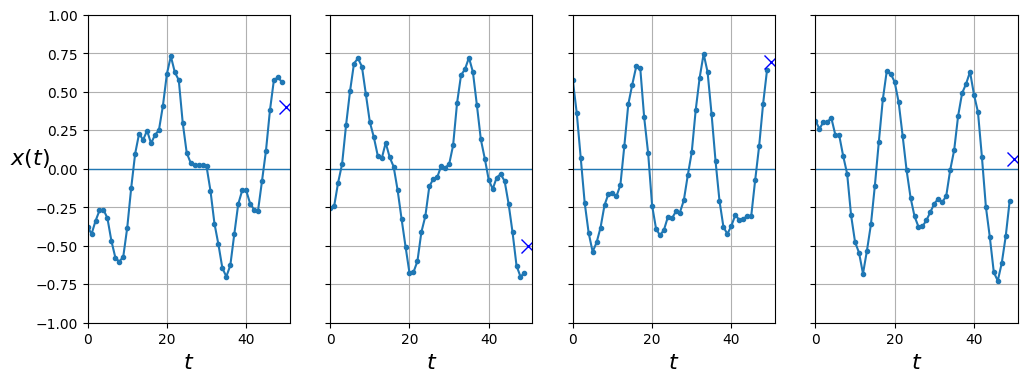

In [50]:
# sharey : 그래프의 축 공유
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12, 4))
for col in range(4):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
    y_label=("$x(t)$" if col==0 else None))
plt.show()

📌 X : X51의 예상 위치

📌 앞에서 훈련시킨 후 시계열 데이터가 들어왔을 때 올바른 X를 찍을 수 있는가

In [51]:
y_pred = X_valid[:, -1] # 마지막 값
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

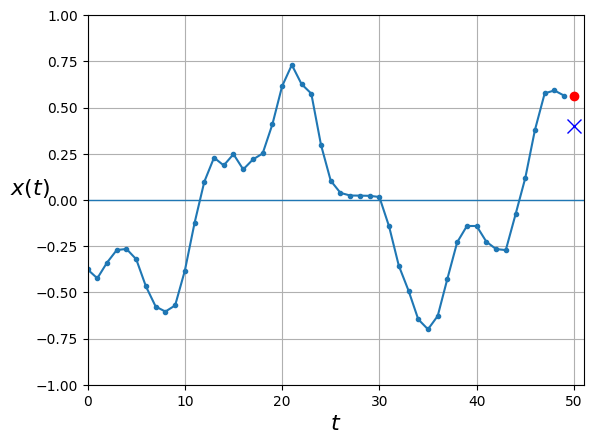

In [52]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

📌붉은 동그라미 : 마지막 값을 이용한 단순 예측값

📌X : 실제 값

In [53]:
X_train[:1]

array([[[ 0.4596948 ],
        [ 0.31486678],
        [ 0.12497123],
        [-0.1039134 ],
        [-0.33817387],
        [-0.53167135],
        [-0.65472883],
        [-0.6680997 ],
        [-0.6068115 ],
        [-0.50168324],
        [-0.27951923],
        [-0.15070675],
        [ 0.01001816],
        [ 0.11860766],
        [ 0.09566415],
        [ 0.1479297 ],
        [ 0.16850619],
        [ 0.19524719],
        [ 0.22094081],
        [ 0.38448656],
        [ 0.4021102 ],
        [ 0.5566975 ],
        [ 0.55000687],
        [ 0.47437248],
        [ 0.29733396],
        [ 0.13306592],
        [-0.1292547 ],
        [-0.36367297],
        [-0.49515054],
        [-0.65279794],
        [-0.6665792 ],
        [-0.5604573 ],
        [-0.50344354],
        [-0.28775147],
        [-0.12684062],
        [-0.0095053 ],
        [ 0.12024356],
        [ 0.18013756],
        [ 0.1559989 ],
        [ 0.1756968 ],
        [ 0.217454  ],
        [ 0.30272725],
        [ 0.38143268],
        [ 0

In [54]:
# 1차원 시계열
X_train.shape

(7000, 50, 1)

In [55]:
srnn_layer = keras.layers.SimpleRNN(units=1, input_shape = [None, 1])
srnn_layer(X_train[:1])     # y50 값 반환

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.53020585]], dtype=float32)>

In [56]:
# return_sequences = True : 모든 step에 대한 출력 결과 반환
keras.layers.SimpleRNN(units=1, input_shape=[None, 1], return_sequences=True)(X_train[:1])

<tf.Tensor: shape=(1, 50, 1), dtype=float32, numpy=
array([[[ 0.63254917],
        [ 0.8155167 ],
        [ 0.76914376],
        [ 0.53746897],
        [-0.0110701 ],
        [-0.7031353 ],
        [-0.94307506],
        [-0.9658713 ],
        [-0.9603317 ],
        [-0.9440564 ],
        [-0.88480026],
        [-0.81076455],
        [-0.66095895],
        [-0.43704298],
        [-0.2746346 ],
        [-0.03466932],
        [ 0.23422816],
        [ 0.501218  ],
        [ 0.6960506 ],
        [ 0.8667123 ],
        [ 0.90851635],
        [ 0.9479856 ],
        [ 0.95080775],
        [ 0.9378955 ],
        [ 0.8896386 ],
        [ 0.8024589 ],
        [ 0.5319061 ],
        [-0.05792961],
        [-0.6968216 ],
        [-0.94202095],
        [-0.9656343 ],
        [-0.95402104],
        [-0.94367933],
        [-0.8875855 ],
        [-0.79809   ],
        [-0.671521  ],
        [-0.4434188 ],
        [-0.15008189],
        [ 0.10259597],
        [ 0.36927843],
        [ 0.61814827],
     

In [58]:
# 마지막 스텝 직후의 시계열 값을 예측하는 것이 목표
np.random.seed(42)
tf.random.set_seed(42)

# X51에 대한 예측, y50 값 출력
model = keras.models.Sequential([
    keras.layers.SimpleRNN(units=1, input_shape=[None, 1])
])

In [59]:
# 가장 간단한 형태의 RNN => 입력 1개 + 이전 타임 스텝의 출력 1개 + 편향 1개
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [61]:
optimizer = keras.optimizers.Adam(learning_rate = 0.005)

In [62]:
# y : 양적 변수 ==> loss function : "mse"
model.compile(loss='mse', optimizer = optimizer)

In [63]:
# batch_size = 32 (default)
history = model.fit(X_train, y_train, epochs=20,
validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0967 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0369 - val_loss: 0.0296
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0253 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0116 - val_loss: 0.0110

In [64]:
# validation set에 대한 MSE 측정 결과
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0109


0.010881561785936356

In [65]:
# Validation set에 대한 예측값
y_pred = model.predict(X_valid)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[ 0.51761144],
       [-0.603583  ],
       [ 0.6157377 ],
       ...,
       [-0.1806495 ],
       [-0.18601239],
       [ 0.50569546]], dtype=float32)

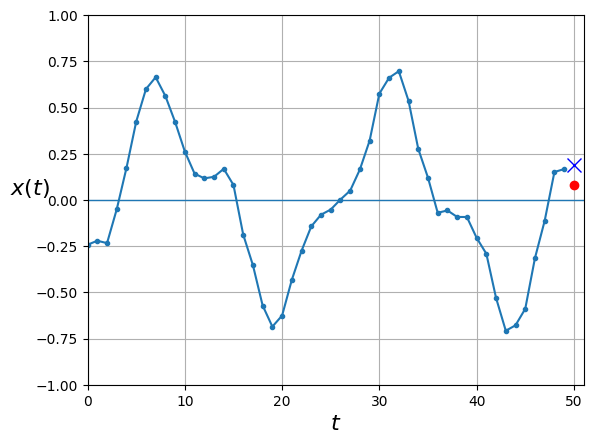

In [66]:
# 실제값(X)과 예측값(동그라미) 비교
plot_series(X_valid[4, :, 0], y_valid[4, 0], y_pred[4, 0])
plt.show()

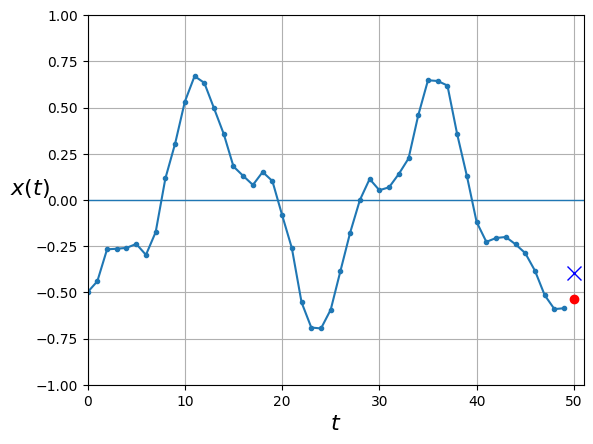

In [67]:
plot_series(X_valid[5, :, 0], y_valid[5, 0], y_pred[5, 0])
plt.show()

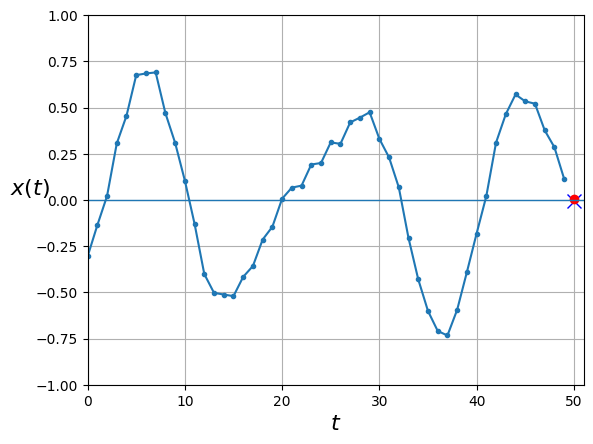

In [68]:
plot_series(X_valid[20, :, 0], y_valid[20, 0], y_pred[20, 0])
plt.show()

##### 심층 RNN

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(units=20),
    keras.layers.Dense(1)
])

In [70]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [71]:
# first layer's parameter
# (input + bias + previous y return) * units
(1 + 1 + 20) * 20

440

In [72]:
# second layer's parameter
# (input + bias + previous y return) * units
(20 + 1 + 20) * 20

820

In [73]:
# last layer's parameter
# input + bias
20 + 1

21

In [75]:
model.compile(optimizer='adam', loss='mse')

In [76]:
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.0232 - val_loss: 0.0052
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0030 - val_loss: 0.0029

In [77]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0026


0.002623623935505748

63/63 [==============================] - 0s 2ms/step


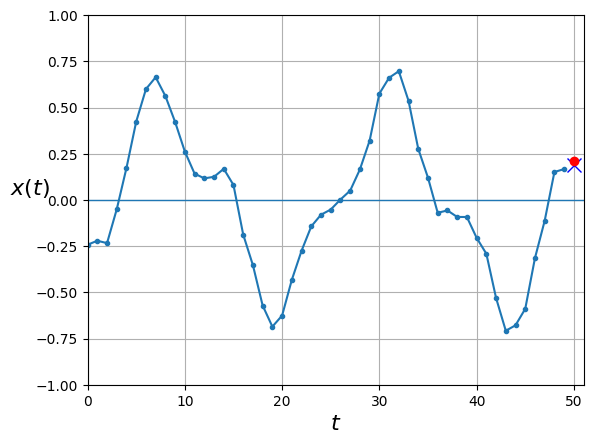

In [78]:
# X : 실제값, 붉은 원 : 예측값
y_pred = model.predict(X_valid)
plot_series(X_valid[4, :, 0], y_valid[4, 0], y_pred[4, 0])
plt.show()

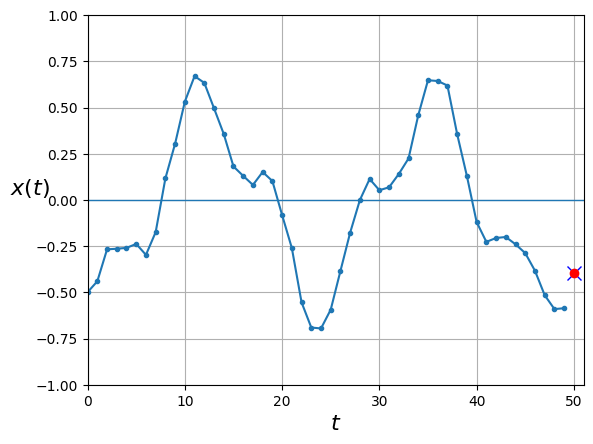

In [79]:
plot_series(X_valid[5, :, 0], y_valid[5, 0], y_pred[5, 0])
plt.show()

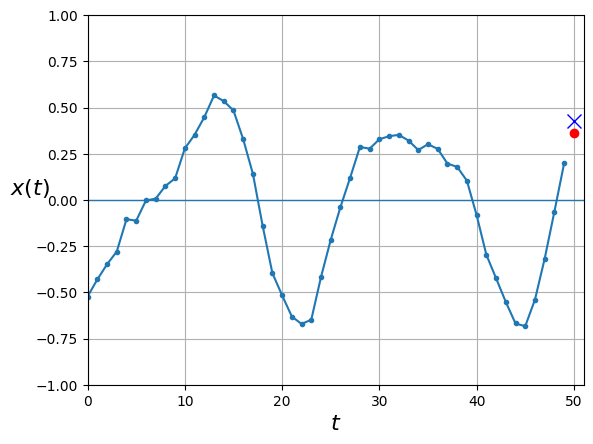

In [80]:
plot_series(X_valid[25, :, 0], y_valid[25, 0], y_pred[25, 0])
plt.show()

##### 여러 스텝에 대한 예측
- 이미 훈련한 모델을 사용 => 다음 값을 예측
- 단점 : 오차 누적

[ X1 - X50 ==> X51 예측<br>
X2 - X51 ==> X52 예측<br>
X3 - X52 ==> X53 예측<br>
:<br>
X10 - X59 ==> X60 예측 ]

In [81]:
np.random.seed(43)

series = generate_time_series(1, n_steps + 10)  # 10개의 미래 step에 대해 예측
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

In [83]:
X.shape

(1, 50, 1)

In [84]:
Y_new.shape

(1, 10, 1)

In [86]:
for step_ahead in range(10):
    # (1, 1) ===> (1, 1, 1)
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :] # np.newaxis : 새로운 축 추가

    # 예측한 y값을 이전의 X들에 연결
    X = np.concatenate([X, y_pred_one], axis=1) # X를 계속 연장

1/1 [==============================] - 0s 14ms/step


In [88]:
# 10개의 미래 step에 대해 예측
# 50이후의 값
Y_pred = X[:, n_steps:]
Y_pred

array([[[ 5.9786546e-01],
        [ 6.2769604e-01],
        [ 5.8461940e-01],
        [ 4.4361150e-01],
        [ 2.5026149e-01],
        [-2.0576781e-04],
        [-2.2154389e-01],
        [-3.9917153e-01],
        [-4.9649712e-01],
        [-5.1475251e-01]]], dtype=float32)

In [89]:
Y_pred.shape

(1, 10, 1)

In [90]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], 'bx-', label='Actual')
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], 'ro-', label='Forecast', markersize=5)
    plt.axis([0, n_steps+ahead, -1, 1])
    plt.legend(fontsize=14)

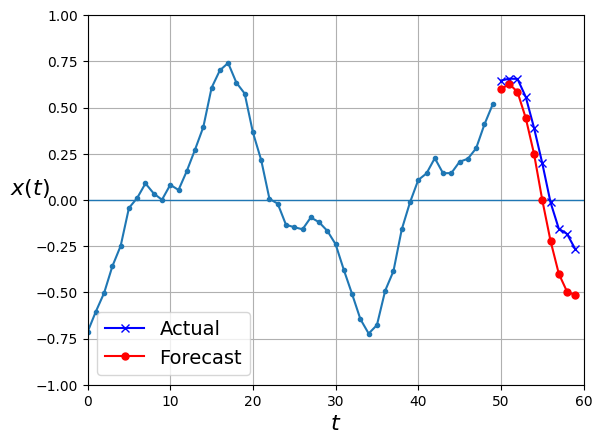

In [92]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

📌 오차가 누적되면 값이 많이 커짐 (X와 동그라미의 차이)

[ 다음 값 10개를 한번에 예측 ]

- target을 다음 10개의 값으로 이루어진 벡터로 변환

In [94]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps+10)    # 60개 생성

X_train, Y_train = series[:7000, n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [95]:
Y_train.shape

(7000, 10)

In [105]:
np.random.seed(43)
tf.random.set_seed(43)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)  # 10개를 한번에 예측 ==> 10개의 유닛을 가진 출력층 필요
])

In [106]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_20 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [107]:
# first layer's parameter
(1 + 1 + 20) * 20

440

In [108]:
# second layer's parameter
(20 + 1 + 20) * 20

820

In [109]:
# last layer's parameter
(20 + 1) * 10

210

In [110]:
model.compile(loss='mse', optimizer='adam')

In [111]:
history = model.fit(X_train, Y_train, epochs=20,
validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1042 - val_loss: 0.2830
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0909 - val_loss: 0.2815
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0909 - val_loss: 0.2798
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0909 - val_loss: 0.2761
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0909 - val_loss: 0.2735
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0909 - val_loss: 0.2709
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0909 - val_loss: 0.2682
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0908 - val_loss: 0.2635
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0908 - val_loss: 0.2563
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0907 - val_loss: 0.2556

In [113]:
# 새로운 시계열 생성
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]

In [114]:
Y_pred = model.predict(X_new)
Y_pred  # (1, 10)

1/1 [==============================] - 0s 178ms/step


array([[ 0.24769624, -0.17836538,  0.40618074,  0.20115112, -0.20828013,
        -0.14611177, -0.11156696,  0.31066367, -0.47201842, -0.23076425]],
      dtype=float32)

In [115]:
# plot_multiple_forecasts 함수로 그리기 위해 차원 추가
Y_pred = Y_pred[..., np.newaxis]
Y_pred  # (1, 10, 1)

array([[[ 0.24769624],
        [-0.17836538],
        [ 0.40618074],
        [ 0.20115112],
        [-0.20828013],
        [-0.14611177],
        [-0.11156696],
        [ 0.31066367],
        [-0.47201842],
        [-0.23076425]]], dtype=float32)

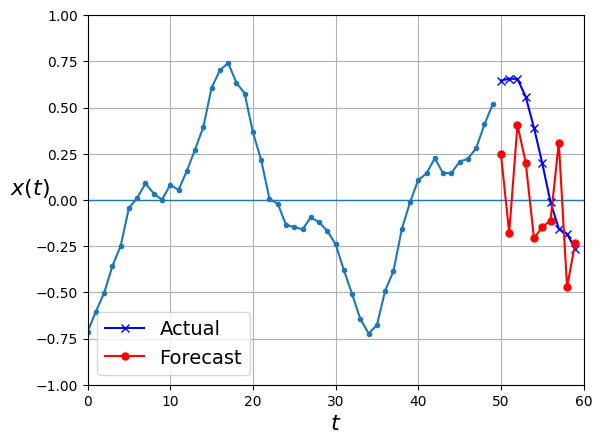

In [116]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()